# Project: Data Analysis for No-shows in medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be doing exploratory data analysis on the medical appointment dataset by the name "No-show appointments". This dataset collects information from 100k medical appointments in Brazil and provides data on patients not showing up and also those showing up for their respective medical appointments. Our task will be to find certain trends or pattern, if any, which would help us determine as to what are the charectersitcs which are affecting no shows in medical appointments.

In [124]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [125]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Data Dictionary
- PatientId - Key for the identification of a patient.
- AppointmentID - Key for identification of an appointment.
- Gender - Male or Female.
- ScheduledDay - The day someone called or registered an appointment, this is before appointment of course.
- AppointmentDay - The day of the actual appointment, when they have to visit the doctor.
- Age - Patient's age.
- Neighbourhood - Where the appointment takes place. 
- Scholarship - Ture of False . Observation, this is a broad topic, consider reading [this](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) article.  
- Hipertension - True or False. 
- Diabetes - True or False. 
- Alcoholism - True or False. 
- Handcap - True or False. 
- SMS_received = 1 or more messages sent to the patient. 
- No-show - True or False where True means that the patient did not show up for the appointment and False means that the patient did show up for the appointment.

In [126]:
# Check size of dataframe
df.shape

(110527, 14)

In [127]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [128]:
# General descriptive summary about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Questions

From a quick review of the descriptive summary of data from the table above, we can ask the following questions:
- Question 1 - How do both females and males fare in terms of no show and show up rates?
- Question 2 - How does enrolment in scholarship program or otherwise affect the no show and show up rates?
- Question 3 - How do patients with and without hypertension fare in terms of no show and show up rates?
- Question 4 - How do patients with and without diabetes fare in terms of no show and show up rates?
- Question 5 - How do patients with and without alcoholism fare in terms of no show and show up rates?
- Question 6 - How do patients with and without handicap fare in terms of no show and show up rates?
- Question 7 - Does sending sms messages for upcoming medical appointments to patients affect the no show and show up rates?
- Question 8 - How does waiting time for an appointment (i.e. difference between the days of 'AppointmentDay' and 'ScheduledDay') affect no show and show up rates?
- Question 9 - What are the neighbourhood associated with the highest no shows?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [129]:
# Create a copy of data to work with
# Copied data can be manipulated and changed as per the requirement of analysis
# Original data source remains unchanged and available at all times.
df_med_app = df.copy()

In [130]:
df_med_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [131]:
# Checking for null values if any
sum(df_med_app.isnull().any())

0

In [132]:
# Checking for duplicate rows in data
sum(df_med_app.duplicated())

0

In [133]:
# Checking data types of all columns
df_med_app.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [134]:
# Get descriptive summary of data
df_med_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Observations and issues with data
- There are no null values in the data.
- There are no duplicate rows in the data.
- PatientId and AppointmentID variables will not have any impact on the patient making an appointment or not and hence those columns can be dropped safely.
- Spelling names for columns 'Hipertension' and 'Handcap' is incorrect. Correct the spelling of the column names to 'Hypertension' and 'Handicap' respectively.
- Change the string values of columns 'ScheduledDay' and 'AppointmentDay' to datetime object values. Also need to check that 'AppointmentDay' should either fall after 'ScheduledDay' or on the same day as 'ScheduledDay'. There should be no entries of 'AppointmentDay' which are prior to the 'ScheduledDay'. If there are any such entries, delete them.
- From the descriptive summary table it appears that the columns 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' have only two values as 0 (min) and 1 (max).
- It appears that column 'Handcap' has multiple values between values 0 (min) and 4 (max). Now there are two approaches to follow here.
    - Approach 1 - These values need to be set to True and False only i.e. 1 for True (for all non-zero values) and 0 for False.
    - Approach 2 - These values can mean 0 for False, and 1 or 2 or 3 or 4 for True, where 1, 2, 3, and 4 could be 4 different kinds of handicaps.
    - I have followed the first approach wherein values are set to True or False only i.e. 1 for True (for all non-zero values) and 0 for False.
    - Neither the first nor the second approach can be assumed to be right. This can only be decided by the data provider.
- Column 'Age' has a minimum value of -1 which is not possible and hence needs to be corrected for e.g. we can replace the negative value with the mean age value.
- Column values for 'No-show' should be changed from strings to integer which will work data analysis much easier. Hence, the values 'Yes' and 'No' should be changed to 1 and 0 respectively.
- Column names need to be uniform. Hence change column names to lower case characters and replace hyphens with underscores to be able to reference using df.column_name function.

### Data Cleaning

#### Dropping the columns 'PatientId' and 'AppointmentID'
PatientId and AppointmentID variables will not have any impact on the patient making an appointment or not and hence those columns can be dropped safely.

In [135]:
# Drop the columns PatientId and AppointmentID
df_med_app.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [136]:
# Check whether the columns have been dropped successfully
df_med_app.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Correcting spelling names for columns - 'Hipertension' and 'Handcap' as 'Hypertension' and 'Handicap'

In [137]:
# Correcting spelling names
df_med_app.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

In [138]:
# confirm changes
df_med_app.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Change the string values of columns 'ScheduledDay' and 'AppointmentDay' to datetime object values.

In [139]:
df_med_app['ScheduledDay'] = pd.to_datetime(df_med_app.ScheduledDay)

In [140]:
df_med_app['AppointmentDay'] = pd.to_datetime(df_med_app.AppointmentDay)

In [141]:
# check the changed data types
df_med_app[['ScheduledDay', 'AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

In [142]:
df_med_app[['ScheduledDay', 'AppointmentDay']].head(2)

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29


#### We find that 'ScheduledDay' column values also contains time in addition to date information, while 'AppointmentDay' column only contains date information. Hence we need to normalize this.

In [143]:
df_med_app['ScheduledDay'] = df_med_app['ScheduledDay'].dt.normalize()

In [144]:
# Check both columns - ScheduledDay and AppointmentDay after normalization
df_med_app[['ScheduledDay', 'AppointmentDay']].head(2)

,ScheduledDay,AppointmentDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29


#### Check to see if there are any entries of 'AppointmentDay' which are prior to the 'ScheduledDay'.

In [145]:
df_med_app[df_med_app['AppointmentDay'] < df_med_app['ScheduledDay']]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


#### Let's add a 'Days_To_Wait' column whose values are the difference of values of 'AppointmentDay' and the day on which the appointment was scheduled i.e. 'ScheduledDay'. And then drop the rows for which 'Days_To_Wait' has negative values.

In [146]:
df_med_app['Days_To_Wait'] = df_med_app['AppointmentDay'] - df_med_app['ScheduledDay']

#### Investigating data type for 'Days_To_Wait' column

In [147]:
df_med_app['Days_To_Wait'].head(2)

0   0 days
1   0 days
Name: Days_To_Wait, dtype: timedelta64[ns]

In [148]:
df_med_app.dtypes

Gender                     object
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                    object
Days_To_Wait      timedelta64[ns]
dtype: object

#### Changing 'Days_To_Wait' column values to integer values.

In [149]:
df_med_app['Days_To_Wait'] = (df_med_app['Days_To_Wait'].apply(lambda x: str(x))).apply(lambda x: x.split(" ")[0])
df_med_app['Days_To_Wait'] = df_med_app['Days_To_Wait'].apply(lambda x: int(x))

In [150]:
# Check the changes for 'Days_To_Wait' column values
df_med_app.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
Days_To_Wait               int64
dtype: object

#### Now we can drop the rows for which 'Days_To_Wait' value is negative.

In [151]:
df_med_app['Days_To_Wait'].min(), df_med_app['Days_To_Wait'].max()

(-6, 179)

In [152]:
# Drop rows for which 'Days_To_Wait' value is negative
df_med_app.drop(df_med_app[df_med_app['Days_To_Wait'] < 0].index, inplace=True)

In [153]:
# Verify there are no more columns for which 'Days_To_Wait' value is negative
df_med_app[df_med_app['Days_To_Wait'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_To_Wait


#### Verify that the columns 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' have only two values 0 and 1.

In [154]:
# Check the unique values for 'Scholarship'
df_med_app.Scholarship.unique()

array([0, 1])

In [155]:
# Check the unique values for 'Hypertension'
df_med_app.Hypertension.unique()

array([1, 0])

In [156]:
# Check the unique values for 'Diabetes'
df_med_app.Diabetes.unique()

array([0, 1])

In [157]:
# Check the unique values for 'Alcoholism'
df_med_app.Alcoholism.unique()

array([0, 1])

In [158]:
# Check the unique values for 'SMS_received'
df_med_app.SMS_received.unique()

array([0, 1])

In [159]:
# Check the unique values for 'Handicap'
df_med_app.Handicap.unique()

array([0, 1, 2, 3, 4])

#### Setting values in the 'Handicap' column to 1 for all non-zero values.

In [160]:
# Using the loc function which takes index (row label as index) as an argument
df_med_app.loc[df_med_app[df_med_app.Handicap > 0].index, 'Handicap'] = 1

In [161]:
# Checking the unique values for handicap column
df_med_app.Handicap.unique()

array([0, 1])

#### Correct the negative age value
Updating all the negative values in the 'Age' column with mean age value.

In [162]:
# Rows containing negative age values
df_med_app[df_med_app.Age < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_To_Wait
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [163]:
# Using loc function which takes label (index label) as an argument to update with mean value
df_med_app.loc[99832, 'Age'] = df_med_app.Age.mean()

In [164]:
# Cross check for any negative values
df_med_app[df_med_app.Age < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_To_Wait


#### Change the 'Yes' and 'No' values for 'No-show' column to 1 and 0 respectively.

In [165]:
# Using the loc function which takes index (row label as index) as an argument
df_med_app.loc[df_med_app[df_med_app['No-show'] == 'Yes'].index, 'No-show'] = 1
df_med_app.loc[df_med_app[df_med_app['No-show'] == 'No'].index, 'No-show'] = 0

In [166]:
df_med_app.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
Days_To_Wait               int64
dtype: object

#### Observe that the data type of No-show column is showing as object i.e. string. This is because we are adding integer values to a column whose data type is string and hence the integer values get converted to string as well.

In [167]:
# Change string values for column 'No-show' to integer values
df_med_app['No-show'] = df_med_app['No-show'].apply(lambda x: int(x))

In [168]:
# Check data types
df_med_app.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                    int64
Days_To_Wait               int64
dtype: object

In [169]:
# Verify the change has been made correctly
df_med_app[df_med_app['No-show'] == 1].shape[0] + \
df_med_app[df_med_app['No-show'] == 0].shape[0] == df_med_app.shape[0]

True

#### Change column names to lower case with underscores to follow uniformity.

In [170]:
# Changing column names to lower case characters
# replace hyphens with underscores
df_med_app.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [171]:
# confirm changes
df_med_app.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_to_wait
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data, we're ready to move on to exploration. We will try to answer each of the research questions posed in the 'Introduction' from above.

#### Creating masks for no_show and appointment_completed to classify data into the 2 categories with same names.

In [172]:
no_show = df_med_app.no_show == 1

In [173]:
show_up = df_med_app.no_show == 0

In [174]:
# Get the count of no_show and appointment_completed after classifying the data into these 2 categories
df_med_app[no_show].shape[0], df_med_app[show_up].shape[0]

(22314, 88208)

In [175]:
# Get the proportion of no_show and appointment_completed
df_med_app[no_show].shape[0] / df_med_app.shape[0], df_med_app[show_up].shape[0] / df_med_app.shape[0]

(0.2018964550044335, 0.7981035449955665)

In [176]:
# Checking for accuracy of proportions
df_med_app[no_show].shape[0] + df_med_app[show_up].shape[0] == df_med_app.shape[0]

True

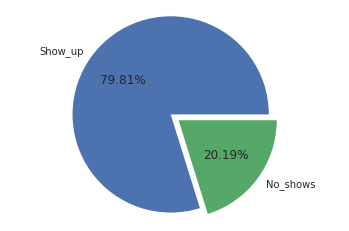

In [177]:
# Pie graph for proportion of appointments completed and no-shows
sns.set(style='darkgrid')
plt.pie(df_med_app.no_show.value_counts(), \
        labels=['Show_up', 'No_shows'], \
        explode=[0.1, 0], autopct="%.2f%%")
plt.axis('equal');

#### Observation: 20 % of all the medical appointments result in no show.

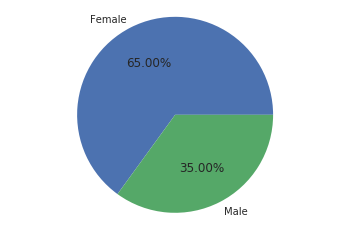

In [178]:
# Pie graph for proportion of male and female
plt.pie(df_med_app.gender.value_counts(), \
        labels=['Female', 'Male'], \
        autopct="%.2f%%")
plt.axis('equal');

#### Observation: 65 % of all the total data comes from females and 35% from males. It is clear that females account for more than 50% of all the medical appointments.
- In light of this fact, we cannot be comparing trends for females and males against each other. This is because the proportion of females is much higher for both the categories as compared to proportion of males.
- However, it would be interesting and sensible to view trends among each of the genders (females and males) for the categories namely no show and show up (masks have been created above).

#### Let us now find what is the proportion of females for categories 'no_show' and 'show_up' for which masks have been created above. Also, let's compare that with the proportion of males for categories 'no_show' and 'show_up'.

In [179]:
# Find the poportion of females in the categories 'no_show' and 'appointment_completed' using masks
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_female_no_show = df_med_app[no_show].query('gender == "F"').shape[0] / df_med_app[no_show].shape[0]
proportion_female_show_up = df_med_app[show_up].query('gender == "F"').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_female = proportion_female_no_show, proportion_female_show_up
proportion_vals_female

(0.6538944160616653, 0.6489887538545257)

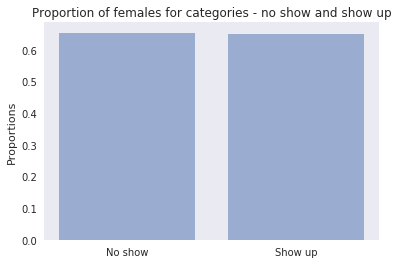

In [180]:
# plotting the bar chart
plt.bar(x_pos, proportion_vals_female, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Proportion of females for categories - no show and show up');

In [181]:
# Find the poportion of males in the categories 'no_show' and 'appointment_completed' using masks
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_male_no_show = df_med_app[no_show].query('gender == "M"').shape[0] / df_med_app[no_show].shape[0]
proportion_male_show_up = df_med_app[show_up].query('gender == "M"').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_male = proportion_male_no_show, proportion_male_show_up
proportion_vals_male

(0.3461055839383347, 0.35101124614547435)

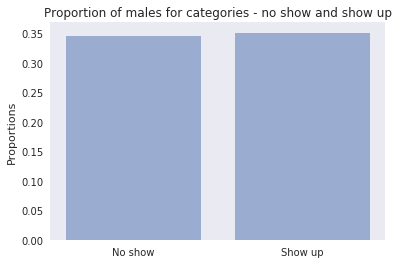

In [182]:
# plotting the bar chart
plt.bar(x_pos, proportion_vals_male, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Proportion of males for categories - no show and show up');

- Question 1 - How do both females and males fare in terms of no show and show up rates?
> ##### Answer 1: Females not showing up for appointments are a slight bit higher than those showing up for appointments whereas males showing up for appointments are a slight bit higher than those not showing up for appointments.

#### Creating masks for scholarship and no_scholarship to classify data into the 2 categories with same names.

In [183]:
scholarship = df_med_app.scholarship == 1

In [184]:
no_scholarship = df_med_app.scholarship == 0

In [185]:
# Get the count of scholarship and no_scholarship after classifying the data into these 2 categories
df_med_app[scholarship].shape[0], df_med_app[no_scholarship].shape[0]

(10861, 99661)

In [186]:
# Get the proportion of scholarship and no_scholarship
df_med_app[scholarship].shape[0] / df_med_app.shape[0], df_med_app[no_scholarship].shape[0] / df_med_app.shape[0]

(0.0982700276867954, 0.9017299723132046)

In [187]:
# Checking for accuracy of proportions
df_med_app[scholarship].shape[0] + df_med_app[no_scholarship].shape[0] == df_med_app.shape[0]

True

#### Observation: 90% of all the total entries are without scholarship and only 10% of them are having scholarship.
- In light of this fact, we cannot be comparing trends for patients with and without scholarship against each other. This is because the proportion of entries without scholarship is much higher for both the categories as compared to proportion with scholarship.
- However, it would be interesting and sensible to view trends among scholarship and no scholarship groups for the categories namely no show and show up (masks have been created above).

In [188]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_scholarship_no_show = df_med_app[no_show].query('scholarship == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_scholarship_show_up = df_med_app[show_up].query('scholarship == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_scholarship = proportion_scholarship_no_show, proportion_scholarship_show_up
proportion_vals_scholarship

(0.11553284933225777, 0.09390304734264465)

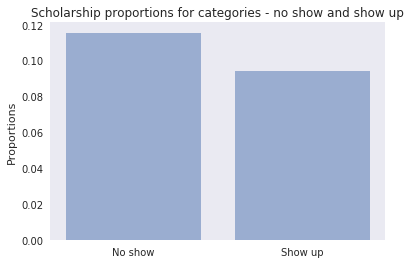

In [189]:
plt.bar(x_pos, proportion_vals_scholarship, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Scholarship proportions for categories - no show and show up');

In [190]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_no_scholarship_no_show = df_med_app[no_show].query('scholarship == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_no_scholarship_show_up = df_med_app[show_up].query('scholarship == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_no_scholarship = proportion_no_scholarship_no_show, proportion_no_scholarship_show_up
proportion_vals_no_scholarship

(0.8844671506677422, 0.9060969526573553)

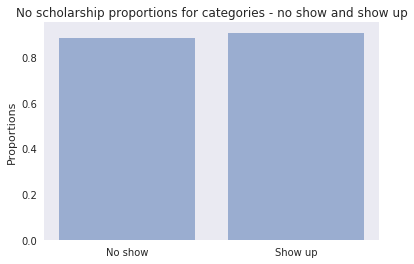

In [191]:
plt.bar(x_pos, proportion_vals_no_scholarship, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('No scholarship proportions for categories - no show and show up');

- Question 2 - How does enrolment in scholarship program or otherwise affect the no show and show up rates?
> ##### Answer 2: - Contrary to what is expected, patients with scholarship have higher proportions of no show than show up and patients without scholarship have a slightly higher proportion of show up than no show. Scholarship program doesn't seem to be effective in encouraging patients to show up for their medical appointments.

#### Creating masks for hypertension and no_hypertension to classify data into the 2 categories with same names.

In [192]:
hypertension = df_med_app.hypertension == 1

In [193]:
no_hypertension = df_med_app.hypertension == 0

In [194]:
# Get the count of hypertension and no_hypertension after classifying the data into these 2 categories
df_med_app[hypertension].shape[0], df_med_app[no_hypertension].shape[0]

(21801, 88721)

In [195]:
# Get the proportion of hypertension and no_hypertension
df_med_app[hypertension].shape[0] / df_med_app.shape[0], df_med_app[no_hypertension].shape[0] / df_med_app.shape[0]

(0.1972548451891931, 0.8027451548108069)

In [196]:
# Checking for accuracy of proportions
df_med_app[hypertension].shape[0] + df_med_app[no_hypertension].shape[0] == df_med_app.shape[0]

True

#### Observation: 80% of all the total entries are without hypertension and approximately 20% of them are having hypertension.
- In light of this fact, we cannot be comparing trends for patients with and without hypertension against each other. This is because the proportion of entries without hypertension is much higher for both the categories as compared to proportion with hypertension.
- However, it would be interesting and sensible to view trends among hypertension and no hypertension groups for the categories namely no show and show up (masks have been created above).

In [197]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_hypertension_no_show = df_med_app[no_show].query('hypertension == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_hypertension_show_up = df_med_app[show_up].query('hypertension == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_hypertension = proportion_hypertension_no_show, proportion_hypertension_show_up
proportion_vals_hypertension

(0.16904185713005287, 0.20439189189189189)

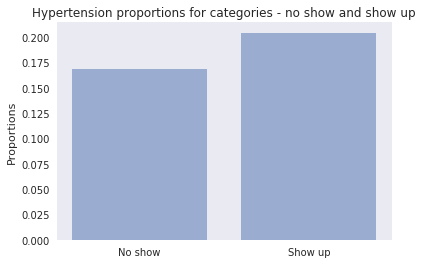

In [198]:
plt.bar(x_pos, proportion_vals_hypertension, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Hypertension proportions for categories - no show and show up');

In [199]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_no_hypertension_no_show = df_med_app[no_show].query('hypertension == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_no_hypertension_show_up = df_med_app[show_up].query('hypertension == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_no_hypertension = proportion_no_hypertension_no_show, proportion_no_hypertension_show_up
proportion_vals_no_hypertension

(0.8309581428699471, 0.7956081081081081)

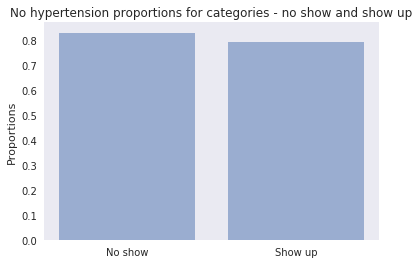

In [200]:
plt.bar(x_pos, proportion_vals_no_hypertension, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('No hypertension proportions for categories - no show and show up');

- Question 3 - How do patients with and without hypertension fare in terms of no show and show up rates?
> ##### Answer 3: - Patients with hypertension have higher proportions of show up than no show whereas patients without hypertension have a slightly higher proportion of no shows than show ups. Patients with hypertension are more inclined to show up for their medical appointments.

#### Creating masks for diabetes and no_diabetes to classify data into the 2 categories with same names.

In [201]:
diabetes = df_med_app.diabetes == 1

In [202]:
no_diabetes = df_med_app.diabetes == 0

In [203]:
# Get the count of diabetes and no_diabetes after classifying the data into these 2 categories
df_med_app[diabetes].shape[0], df_med_app[no_diabetes].shape[0]

(7943, 102579)

In [204]:
# Get the proportion of diabetes and no_diabetes
df_med_app[diabetes].shape[0] / df_med_app.shape[0], df_med_app[no_diabetes].shape[0] / df_med_app.shape[0]

(0.0718680443712564, 0.9281319556287436)

In [205]:
# Checking for accuracy of proportions
df_med_app[diabetes].shape[0] + df_med_app[no_diabetes].shape[0] == df_med_app.shape[0]

True

#### Observation: 92% of all the total entries are without diabetes and only 7% of them are having diabetes.
- In light of this fact, we cannot be comparing trends for pateients with and without diabetes against each other. This is because the proportion of entries without diabetes is much higher for both the categories as compared to proportion with diabetes.
- However, it would be interesting and sensible to view trends among diabetes and no diabetes groups for the categories namely no show and show up (masks have been created above).

In [206]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_diabetes_no_show = df_med_app[no_show].query('diabetes == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_diabetes_show_up = df_med_app[show_up].query('diabetes == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_diabetes = proportion_diabetes_no_show, proportion_diabetes_show_up
proportion_vals_diabetes

(0.06408532759702429, 0.0738368401959006)

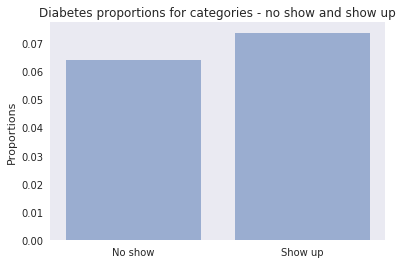

In [207]:
plt.bar(x_pos, proportion_vals_diabetes, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Diabetes proportions for categories - no show and show up');

In [208]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_no_diabetes_no_show = df_med_app[no_show].query('diabetes == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_no_diabetes_show_up = df_med_app[show_up].query('diabetes == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_diabetes = proportion_no_diabetes_no_show, proportion_no_diabetes_show_up
proportion_vals_diabetes

(0.9359146724029757, 0.9261631598040994)

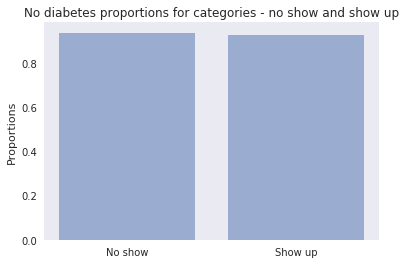

In [209]:
plt.bar(x_pos, proportion_vals_diabetes, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('No diabetes proportions for categories - no show and show up');

- Question 4 - How do patients with and without diabetes fare in terms of no show and show up rates?
> ##### Answer 4: - Patients with diabetes have higher proportions of show up than no show whereas patients without diabetes have a slightly higher proportion of no show than show up. Patients with diabetes are more inclined to show up for their medical appointments.

#### Creating masks for alcoholism and no_alcoholism to classify data into the 2 categories with same names.

In [210]:
alcoholism = df_med_app.alcoholism == 1

In [211]:
no_alcoholism = df_med_app.alcoholism == 0

In [212]:
# Get the count of alcoholism and no_alcoholism after classifying the data into these 2 categories
df_med_app[alcoholism].shape[0], df_med_app[no_alcoholism].shape[0]

(3360, 107162)

In [213]:
# Get the proportion of alcoholism and no_alcoholism
df_med_app[alcoholism].shape[0] / df_med_app.shape[0], df_med_app[no_alcoholism].shape[0] / df_med_app.shape[0]

(0.03040118709397224, 0.9695988129060278)

In [214]:
# Checking for accuracy of proportions
df_med_app[alcoholism].shape[0] + df_med_app[no_alcoholism].shape[0] == df_med_app.shape[0]

True

#### Observation: Approximately 97% of all the total entries are without alcoholism and only 3% of them are with alcoholism.
- In light of this fact, we cannot be comparing trends for patients with and without alcoholism against each other. This is because the proportion of entries without alcoholism is much higher for both the categories as compared to proportion with alcoholism.
- However, it would be interesting and sensible to view trends among alcoholism and no alcoholism groups for the categories namely no show and show up (masks have been created above).

In [215]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_alcoholism_no_show = df_med_app[no_show].query('alcoholism == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_alcoholism_show_up = df_med_app[show_up].query('alcoholism == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_alcoholism = proportion_alcoholism_no_show, proportion_alcoholism_show_up
proportion_vals_alcoholism

(0.030339697051178633, 0.030416742245601307)

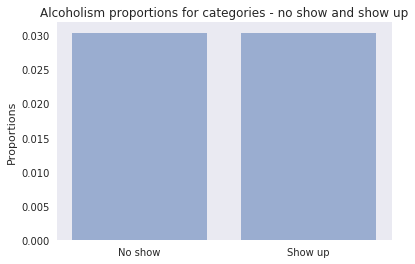

In [216]:
plt.bar(x_pos, proportion_vals_alcoholism, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Alcoholism proportions for categories - no show and show up');

In [217]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_no_alcoholism_no_show = df_med_app[no_show].query('alcoholism == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_no_alcoholism_show_up = df_med_app[show_up].query('alcoholism == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_no_alcoholism = proportion_no_alcoholism_no_show, proportion_no_alcoholism_show_up
proportion_vals_no_alcoholism

(0.9696603029488213, 0.9695832577543987)

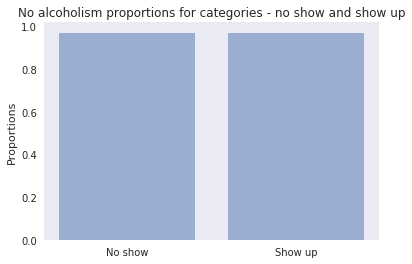

In [218]:
plt.bar(x_pos, proportion_vals_no_alcoholism, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('No alcoholism proportions for categories - no show and show up');

- Question 5 - How do patients with and without alcoholism fare in terms of no show and show up rates?
> ##### Answer 5: - Patients with alcoholism have almost similar proportion of no show and show up. Patients without alcoholism also have almost similar proportion of no show and show up. We cannot conclude anything with certainity based on this data related to alcoholism.

#### Creating masks for handicap and no_handicap to classify data into the 2 categories with same names.

In [219]:
handicap = df_med_app.handicap == 1

In [220]:
no_handicap = df_med_app.handicap == 0

In [221]:
# Get the count of handicap and no_handicap after classifying the data into these 2 categories
df_med_app[handicap].shape[0], df_med_app[no_handicap].shape[0]

(2239, 108283)

In [222]:
# Get the proportion of handicap and no_handicap
df_med_app[handicap].shape[0] / df_med_app.shape[0], df_med_app[no_handicap].shape[0] / df_med_app.shape[0]

(0.020258410090298763, 0.9797415899097013)

In [223]:
# Checking for accuracy of proportions
df_med_app[handicap].shape[0] + df_med_app[no_handicap].shape[0] == df_med_app.shape[0]

True

#### Observation: Approximately 98% of all the total entries are without handicap and only 2% of them are with handicap.
- In light of this fact, we cannot be comparing trends for patients with and without handicap against each other. This is because the proportion of entries without handicap is much higher for both the categories as compared to proportion with handicap.
- However, it would be interesting and sensible to view trends among handicap and no handicap groups for the categories namely no show and show up (masks have been created above).

In [224]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_handicap_no_show = df_med_app[no_show].query('handicap == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_handicap_show_up = df_med_app[show_up].query('handicap == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_handicap = proportion_handicap_no_show, proportion_handicap_show_up
proportion_vals_handicap

(0.018150040333422962, 0.020791764919281697)

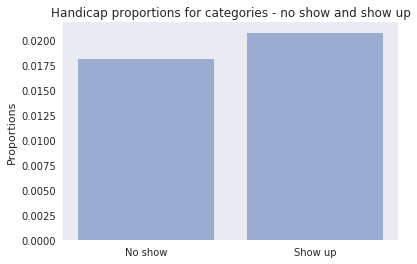

In [225]:
plt.bar(x_pos, proportion_vals_handicap, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Handicap proportions for categories - no show and show up');

In [226]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_no_handicap_no_show = df_med_app[no_show].query('handicap == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_no_handicap_show_up = df_med_app[show_up].query('handicap == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_no_handicap = proportion_no_handicap_no_show, proportion_no_handicap_show_up
proportion_vals_no_handicap

(0.9818499596665771, 0.9792082350807183)

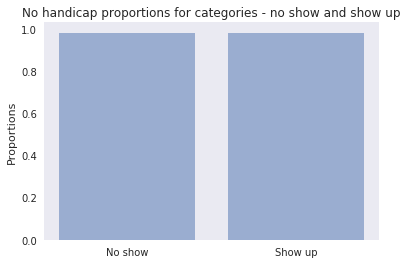

In [227]:
plt.bar(x_pos, proportion_vals_no_handicap, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('No handicap proportions for categories - no show and show up');

- Question 6 - How do patients with and without handicap fare in terms of no show and show up rates?
> ##### Answer 6: - Patients with handicap have higher proportions of show up than no show whereas patients without handicap have a slightly higher proportion of no show than show up. Patients with handicap are more inclined to show up for their medical appointments.

#### Creating masks for sms received and sms not received to classify data into the 2 categories with same names.

In [228]:
sms_received = df_med_app.sms_received == 1

In [229]:
sms_not_received = df_med_app.sms_received == 0

In [230]:
# Get the count of sms_received and sms_not_received after classifying the data into these 2 categories
df_med_app[sms_received].shape[0], df_med_app[sms_not_received].shape[0]

(35482, 75040)

In [231]:
# Get the proportion of sms_received and sms_not_received
df_med_app[sms_received].shape[0] / df_med_app.shape[0], df_med_app[sms_not_received].shape[0] / df_med_app.shape[0]

(0.3210401549012866, 0.6789598450987134)

In [232]:
# Checking for accuracy of proportions
df_med_app[sms_received].shape[0] + df_med_app[sms_not_received].shape[0] == df_med_app.shape[0]

True

#### Observation: Approximately 68% of the patients do not receive sms message prior to appointment and 32% of them do receive sms message prior to appointment.
- In light of this fact, we cannot be comparing trends for entries with and without 'sms_received' against each other. This is because the proportion of entries for sms_not_received is much higher for both the categories as compared to proportion with sms_received.
- However, it would be interesting and sensible to view trends among sms_received and sms_not_received groups for the categories namely no show and show up (masks have been created above).

In [233]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_sms_received_no_show = df_med_app[no_show].query('sms_received == 1').shape[0] / df_med_app[no_show].shape[0]
proportion_sms_received_show_up = df_med_app[show_up].query('sms_received == 1').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_sms_received = proportion_sms_received_no_show, proportion_sms_received_show_up
proportion_vals_sms_received

(0.43846912252397596, 0.2913341193542536)

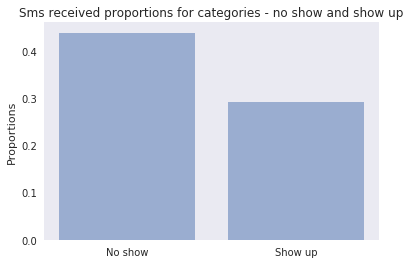

In [234]:
plt.bar(x_pos, proportion_vals_sms_received, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Sms received proportions for categories - no show and show up');

In [235]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_sms_not_received_no_show = df_med_app[no_show].query('sms_received == 0').shape[0] / df_med_app[no_show].shape[0]
proportion_sms_not_received_show_up = df_med_app[show_up].query('sms_received == 0').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_sms_not_received = proportion_sms_not_received_no_show, proportion_sms_not_received_show_up
proportion_vals_sms_not_received

(0.561530877476024, 0.7086658806457464)

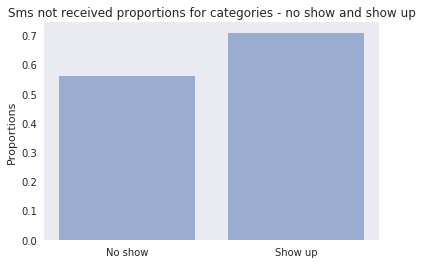

In [236]:
plt.bar(x_pos, proportion_vals_sms_not_received, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Sms not received proportions for categories - no show and show up');

- Question 7 - Does sending sms messages for upcoming medical appointments to patients affect the no show and show up rates?
> ##### Answer 7: - Contrary to what's expected, patients receiving sms message have higher proportions of no show than show up whereas patients not receiving sms message have higher proportion of show up than no show. Hence, sending sms messages is not that big a factor in decreasing the count of no show.

In [237]:
df_med_app['days_to_wait'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_to_wait, dtype: float64

In [238]:
days_to_wait_below_mean = df_med_app['days_to_wait'] < df_med_app['days_to_wait'].mean()

In [239]:
days_to_wait_above_mean = df_med_app['days_to_wait'] > df_med_app['days_to_wait'].mean()

In [240]:
# Get the count of days_to_wait_below_mean and days_to_wait_above_mean after classifying data into these 2 categories
df_med_app[days_to_wait_below_mean].shape[0], df_med_app[days_to_wait_above_mean].shape[0]

(76076, 34446)

In [241]:
# Get the proportion of days_to_wait_below_mean and days_to_wait_above_mean
df_med_app[days_to_wait_below_mean].shape[0] / df_med_app.shape[0], df_med_app[days_to_wait_above_mean].shape[0] / df_med_app.shape[0]

(0.6883335444526881, 0.31166645554731187)

In [242]:
# Checking for accuracy of proportions
df_med_app[days_to_wait_below_mean].shape[0] + df_med_app[days_to_wait_above_mean].shape[0] == df_med_app.shape[0]

True

#### Observation: Approximately 69% of appointments have been booked less than 10 days prior where 10 is the approximate mean value of days_to_wait.  And 32% appointments have been booked prior to days greater than 10.
- It would be interesting to view trends among days_to_wait_below_mean and days_to_wait_above_mean groups for the categories namely no show and show up (masks have been created above).

In [243]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_wait_below_mean_no_show = df_med_app[no_show].query('days_to_wait < 10').shape[0] / df_med_app[no_show].shape[0]
proportion_wait_below_mean_show_up = df_med_app[show_up].query('days_to_wait < 10').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_wait_below_mean = proportion_wait_below_mean_no_show, proportion_wait_below_mean_show_up
proportion_vals_wait_below_mean

(0.478354396343103, 0.7256824777797932)

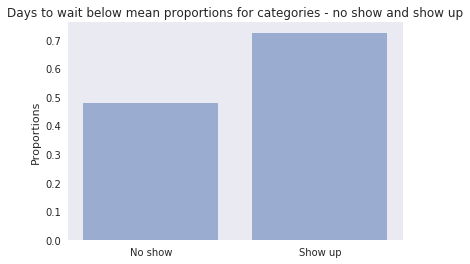

In [244]:
plt.bar(x_pos, proportion_vals_wait_below_mean, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Days to wait below mean proportions for categories - no show and show up');

In [245]:
bar_labels = ['No show', 'Show up']
x_pos = list(range(len(bar_labels)))
proportion_wait_above_mean_no_show = df_med_app[no_show].query('days_to_wait > 10').shape[0] / df_med_app[no_show].shape[0]
proportion_wait_above_mean_show_up = df_med_app[show_up].query('days_to_wait > 10').shape[0] / df_med_app[show_up].shape[0]
proportion_vals_wait_above_mean = proportion_wait_above_mean_no_show, proportion_wait_above_mean_show_up
proportion_vals_wait_above_mean

(0.5019270413193511, 0.2635361871939053)

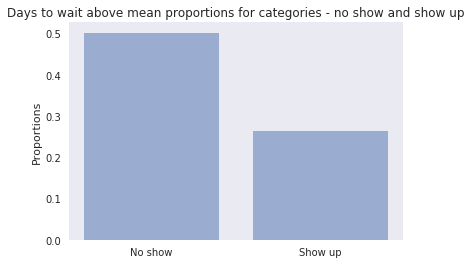

In [246]:
plt.bar(x_pos, proportion_vals_wait_above_mean, align='center', alpha=0.5)
plt.grid()
plt.ylabel('Proportions')
plt.xticks(x_pos, bar_labels)
plt.title('Days to wait above mean proportions for categories - no show and show up');

- Question 8 - How does waiting time for an appointment (i.e. difference between the days of 'AppointmentDay' and 'ScheduledDay') affect no show and show up rates?
> ##### Answer 8: - Patients having less than 10 days waiting for their medical appointment have higher proportions of show up than no show whereas patients having more than 10 days waiting have higher proportions of no show than show up. Hence, patient who have less than 10 days waiting for a medical appointment are more likely to show up.

#### Let's try and find top 10 no show neighbourhoods from the given data.

In [247]:
no_show_neighbourhoods = df_med_app.groupby('neighbourhood').sum()['no_show']
top_10_no_show_neighbourhoods = no_show_neighbourhoods.sort_values(ascending=False).head(10)
top_10_no_show_neighbourhoods

neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           905
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            572
BONFIM                550
Name: no_show, dtype: int64

Text(0,0.5,'No show count')

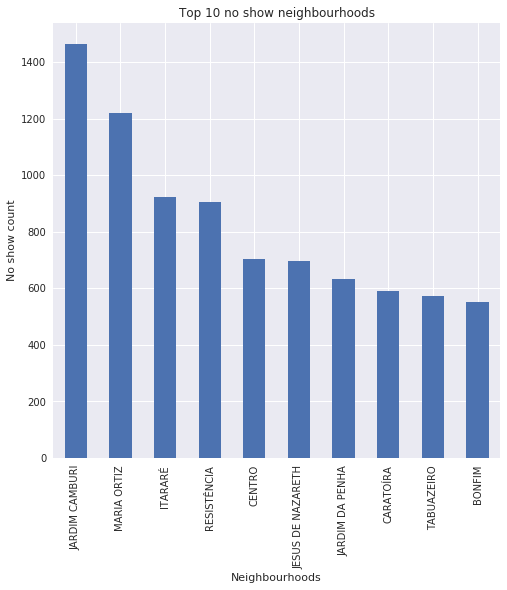

In [248]:
# Plot the graph
top_10_no_show_neighbourhoods.plot(kind='bar',figsize=(8, 8),\
                  title = 'Top 10 no show neighbourhoods');
plt.xlabel('Neighbourhoods')
plt.ylabel('No show count')

- Question 9 - What are the neighbourhood associated with the highest no shows?
> ##### Answer 9: The top 10 no show neighbourhoods (with no show counts) are as mentioned below:
> 1. JARDIM CAMBURI       1465
> 2. MARIA ORTIZ          1219
> 3. ITARARÉ               923
> 4. RESISTÊNCIA           905
> 5. CENTRO                703
> 6. JESUS DE NAZARETH     696
> 7. JARDIM DA PENHA       631
> 8. CARATOÍRA             591
> 9. TABUAZEIRO            572
> 10. BONFIM                550

<a id='conclusions'></a>
## Conclusions

##### After concluding the analysis of the given data set, we arrive at the following conclusions about the questions posed in 'Introduction' section above.

> - Contrary to what is expected, patients with scholarship have higher proportions of no show than show up and patients without scholarship have a slightly higher proportion of show up than no show. Scholarship program doesn't seem to be effective in encouraging patients to show up for their medical appointments.
> - Patients with either of the conditions namely hypertension or diabetes or handicap have higher proportions of show up than no show as compared to patients without these conditions. This is an indication of increased awareness and proactiveness in the society about the treatment for these medical conditons.
> - Contrary to what's expected, patients receiving sms message have higher proportions of no show than show up whereas patients not receiving sms message have higher proportion of show up than no show. Hence, sending sms messages is not that big a factor in decreasing the count of no show.
> - Patients having less than 10 days waiting for their medical appointment have higher proportions of show up than no show whereas patients having more than 10 days waiting have higher proportions of no show than show up. Hence, patient who have less than 10 days waiting for a medical appointment are more likely to show up.

Limitations: The above analysis was my individual view on how to handle this medical data. There could be different approaches to the analysis if the research is focussed on different relationship between the variables. For example, we could be interested in knowing gender specific results for particular age groups which have not been covered in this particular analysis. Another example is the way in which handicap data has been handled in this analysis.  Here the 'Handcap' colulmn had multiple values between values 0 (min) and 4 (max). Now there were two approaches to follow here.
    - Approach 1 - These values need to be set to True and False only i.e. 1 for True (for all non-zero values) and 0 for False.
    - Approach 2 - These values can mean 0 for False, and 1 or 2 or 3 or 4 for True, where 1, 2, 3, and 4 could be 4 different kinds of handicaps.
    - I have followed the first approach wherein values are set to True or False only i.e. 1 for True (for all non-zero values) and 0 for False.
    - Neither the first nor the second approach can be assumed to be right. This can only be decided by the data provider.

Hence this analysis, although highlighting some signficant relationships cannot be considered the complete analysis of this dataset.